<a href="https://colab.research.google.com/github/TamaraMaggioni/DiploDatos2021/blob/main/AnalisisYVisualizacion/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
!pip install joypy
import joypy

seaborn.set_context('talk')
seaborn.set_theme(style="darkgrid")

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO', 'salary_has_bonus', 'profile_years_experience', 'work_contract_type','profile_studies_level']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,profile_studies_level,cured_programming_languages
0,ninguno,Ninguno,43000.0,53000.0,No,3.0,Full-Time,Universitario,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,Universitario,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,Universitario,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,Universitario,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,160000.0,Un sueldo,2.0,Full-Time,Secundario,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,profile_studies_level,cured_programming_languages


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


---------------------------
# Resolución ejercicio 1

#### Definimos como mejor salario:

 - Mayor sueldo neto
 - Incluyendo el bono
 - Salario en blanco

#### La columna de ajuste por inflación nos parece relevante para considerar un mejor sueldo, pero creemos que es compleja de analizar debido a que ese campo en la encuesta es muy subjetivo.
#### La columna de si la empresa paga cursos (profile_specialization_courses) también nos parece relevante, pero es compleja ya que incluye categorías diversas (no comparables), las cuales pudieron ser solventadas tanto por el empleador, el empleado o por ambos. 


In [ ]:
df_lang.head()

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,profile_studies_level,cured_programming_languages
0,ninguno,Ninguno,43000.0,53000.0,No,3.0,Full-Time,Universitario,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,Universitario,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,Universitario,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,Universitario,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,160000.0,Un sueldo,2.0,Full-Time,Secundario,[ninguno]


In [ ]:
# Calculo que personas trabajan en blanco
df_lang['salary_monthly_porcentaje'] = df_lang['salary_monthly_NETO'] / df_lang['salary_monthly_BRUTO']
df_lang['sueldo_en_blanco'] = (df_lang['salary_monthly_porcentaje'] >0.5) & (df_lang['salary_monthly_porcentaje'] <0.9) 


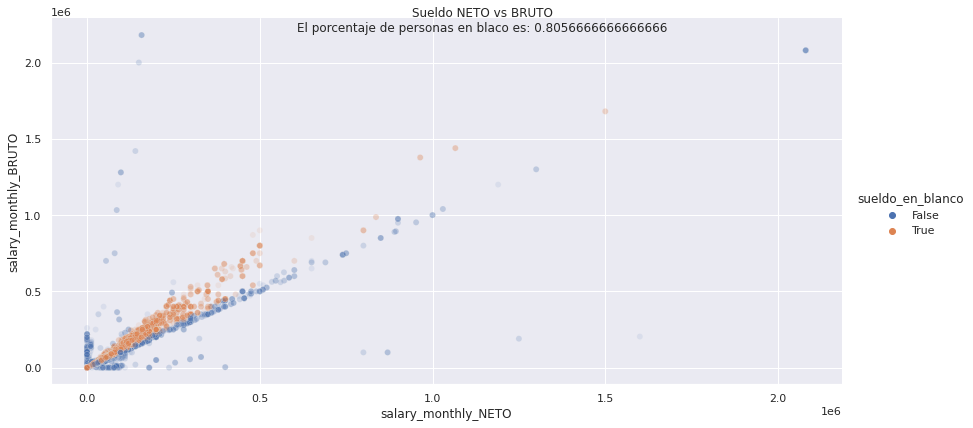

In [ ]:
total_en_blanco = len(df_lang[df_lang['sueldo_en_blanco']])
procentaje_en_blanco = total_en_blanco / len(df_lang)

ax = seaborn.pairplot(
    data=df_lang,
    x_vars=['salary_monthly_NETO'],
    y_vars=['salary_monthly_BRUTO'],
    hue='sueldo_en_blanco',
    aspect=2,
    height=6,
    plot_kws=dict(alpha=0.1)
)
t = ax.fig.suptitle(f"Sueldo NETO vs BRUTO\nEl porcentaje de personas en blaco es: {procentaje_en_blanco}")

#### A continuación, procedemos a filtrar nuestro data set para quedarnos con lo que consideramos "mejores salarios". Vamos a eliminar aquellos encuestados que no programan y a aquellos que dejaron un espacio vacío y respondieron "no" en lenguaje de programación. Luego uniremos las respuestas pl/sql con sql, ya que hacen referencia a un mismo lenguaje, y a css con html debido a la fuerte correlación de estos dos lenguajes. También se filtran a todos aquellos que realizan trabajo part-time, para poder comparar salarios con horas hombre similares.

In [ ]:
# Elimino de mi data frame aquellas personas que no programan
df_filter = df_lang[df_lang.cured_programming_languages.apply(lambda ele: ele != ["ninguno"])].copy()

# Elimino las filas que presentan un espacio vacio en lenguaje de programacion
df_filter.programming_language = df_filter.programming_language.apply(lambda ele: "".join(ele.split()))
df_filter = df_filter[df_filter.programming_language != ""]

# Elimino las personas que como respuesta al lenguaje de programación que usan escribieron "no"
df_filter = df_filter[df_filter.programming_language != "no"]

# Unifico lenguajes 
df_filter.programming_language = df_filter.programming_language.replace("pl/sql", "sql").replace('css', 'html')

# Nos quedamos con los que tiene un sueldo en blanco
df_filter = df_filter[df_filter.sueldo_en_blanco]

# Hay encuestados que a pesar de haber puesto bien la relacion entre sueldo neto y bruto, expresaron su respuesta en miles de pesos. Agregamos ceros a esos valores.
def agrego_los_miles(sueldo):
  if sueldo > 1000:
    return sueldo
  else:
    return sueldo * 1000 

df_filter.salary_monthly_NETO = df_filter.salary_monthly_NETO.apply(agrego_los_miles)

# Nos quedamos con los langs que tiene un conteo mayor a 10
lenguajes_ordenados_cantidad = df_filter.programming_language.value_counts()
df_filter = df_filter[df_filter.programming_language.isin(lenguajes_ordenados_cantidad[lenguajes_ordenados_cantidad > 10].index.to_list())]

# Filtramos aquellos programadores que hacen part-time
df_filter = df_filter[df_filter.work_contract_type != 'Part-Time']

df_filter[:10]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,profile_studies_level,cured_programming_languages,salary_monthly_porcentaje,sueldo_en_blanco
1,html,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,Universitario,"[html, javascript, python]",0.797468,True
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,Universitario,"[html, javascript, python]",0.797468,True
1,python,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,Universitario,"[html, javascript, python]",0.797468,True
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,Posgrado,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,Posgrado,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,Posgrado,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,Posgrado,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,Posgrado,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,Posgrado,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True
3,php,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,Posgrado,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True


#### Calculamos el porcentaje de datos que filtramos para conocer la representatividad de la muestra sobre la población total. Estamos trabajando con un 73.85% de la población original.

In [ ]:
len(df_lang), len(df_filter), len(df_filter)/len(df_lang)

(18000, 13293, 0.7385)

#### La existencia o no de un bono es una variable que modifica sensiblemente el salario neto real que gana cada encuestado. Como la información disponible es categórica, se hace la mejor estimación posible del sueldo real incluyendo el bono, tomando al promedio del rango como bono esperado:

 

*   "Menos de un sueldo" = 0.5 sueldos
*   "Un sueldo" = 1 sueldo
*   "De uno a tres sueldos" = 2 sueldos
*   "3+ sueldos" = 3 sueldos
*   "No" = 0 sueldos



In [ ]:

def bono_a_sueldo(row):
  if row.salary_has_bonus == "No":
    return row.salary_monthly_NETO
  elif row.salary_has_bonus == "Menos de un sueldo":
    return row.salary_monthly_NETO * ( 1 + 0.5 / 12)
  elif row.salary_has_bonus == "Un sueldo":
    return row.salary_monthly_NETO * ( 1 + 1 / 12)
  elif row.salary_has_bonus == "De uno a tres sueldos":
    return row.salary_monthly_NETO * ( 1 + 2 / 12)
  elif row.salary_has_bonus == "3+ sueldos":
    return row.salary_monthly_NETO * ( 1 + 3 / 12)
  else:
    return row.salary_monthly_NETO


df_filter["sueldo_neto_con_bono"] = df_filter.apply(bono_a_sueldo, axis=1)

In [ ]:
lenguajes_ordenados_mediana = df_filter.groupby('programming_language').sueldo_neto_con_bono.median().sort_values(ascending=True).index
lenguajes_ordenados_cantidad = df_filter.programming_language.value_counts().index

#### Realizamos un gráfico de barras para visualizar los lenguajes de programación más utilizados.

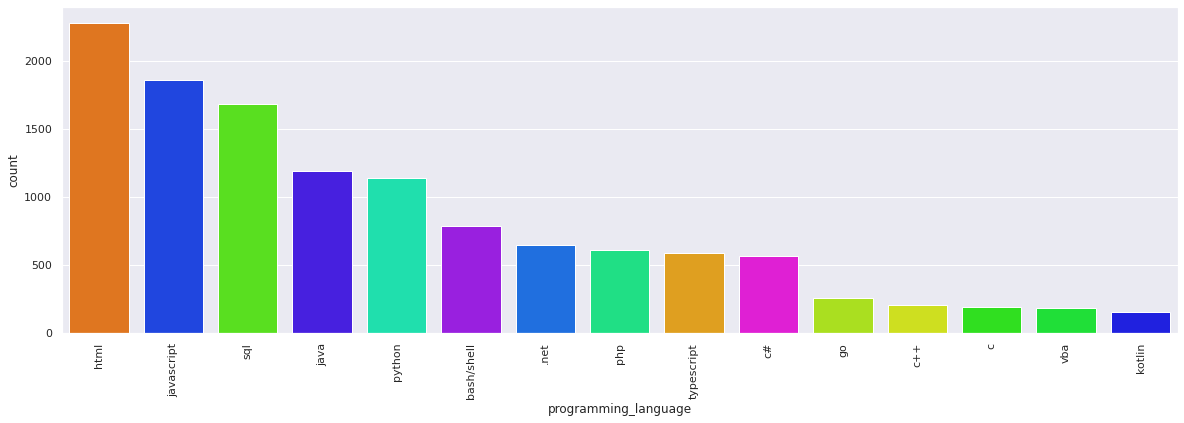

In [ ]:
# Poner colores a cada lenguaje
color_labels = list(set(lenguajes_ordenados_mediana[-15:].tolist() + lenguajes_ordenados_cantidad[:15].tolist()))
rgb_values = seaborn.color_palette("gist_rainbow_r", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

#Gráfico de barras
fig = plt.figure(figsize=(20, 6))
chart = seaborn.countplot(
    x=df_filter.programming_language,
    order = lenguajes_ordenados_cantidad[:15],
    palette = [color_map[clr] for clr in lenguajes_ordenados_cantidad[:15]])
labels = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

#### Realizada la limpieza y el filtrado de los datos, se procede a graficar la distribución de salarios netos en blanco, incluyendo el bono, para los 15 lenguajes de mayor mediana, ordenados por mediana de menor a mayor

(0.0, 600000.0)

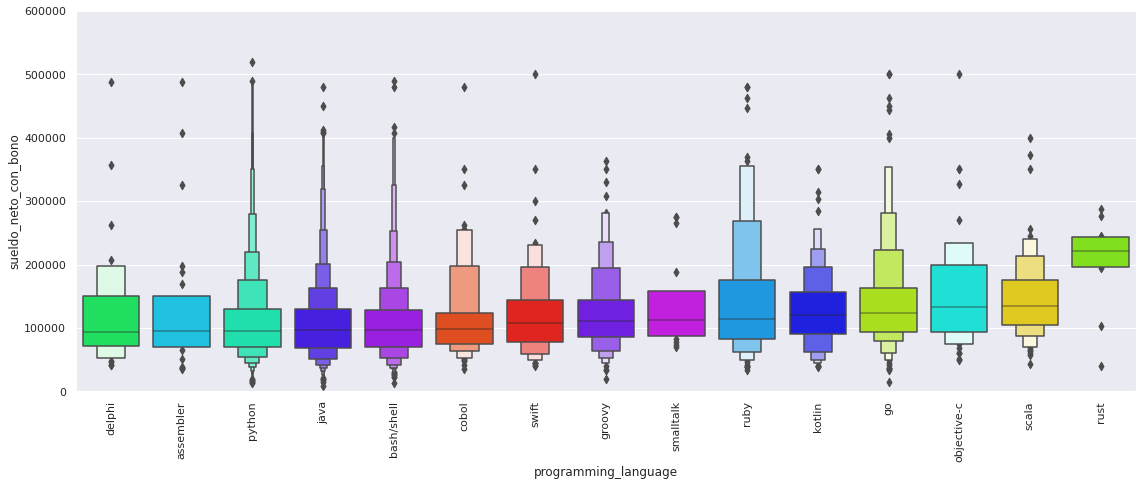

In [ ]:
langs_to_plot = 15
plt.figure(figsize=(19, 7))
seaborn.boxenplot(
    data=df_filter,
    y="sueldo_neto_con_bono",
    x="programming_language",
    color='orangered',
    #order=lenguajes_ordenados_cantidad[:50],
    order=lenguajes_ordenados_mediana[-langs_to_plot:],
    palette = [color_map[clr] for clr in lenguajes_ordenados_mediana[-langs_to_plot:]]
  )
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.ylim(0,600000)

#### Otra forma de analizar estas distribuciones es a través de las funciones de densidad de probabilidad estimadas (kde plots). Este tipo de gráficos reducen la cantidad de información en comparación a un boxenplot, pero aumenta la legibilidad de los mismos.  

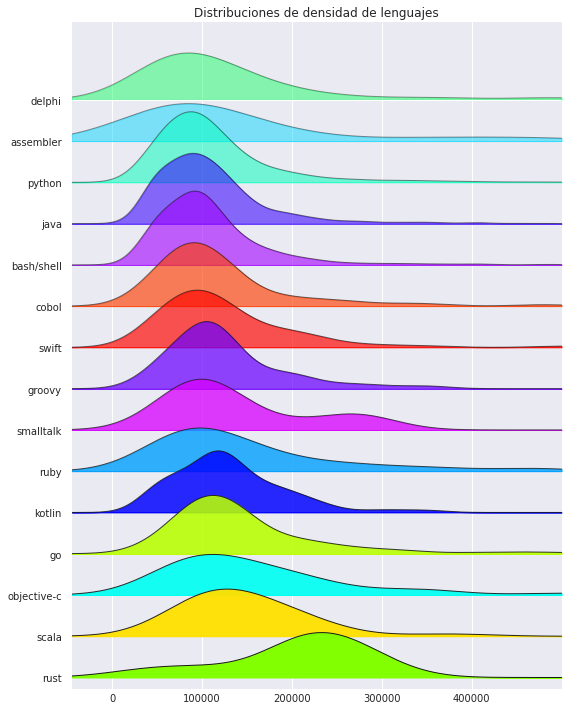

In [ ]:
from matplotlib import cm
%matplotlib inline
labels=lenguajes_ordenados_mediana[-langs_to_plot:]
hacky_replace = {'programming_language': {labels[i]:i for i in range(len(labels))}} #Para que joypy, que ordena alfabéticamente, respete el orden que uno quiere
fig, axes = joypy.joyplot(df_filter[df_filter.programming_language.isin(labels)].replace(hacky_replace), by="programming_language", 
                          column="sueldo_neto_con_bono",  labels=labels,
                          x_range=[-45000, 500000],
                          kind="kde",
                          grid="both", linewidth=1, legend=False, figsize=(8,10),
                          title="Distribuciones de densidad de lenguajes", fade=True, color = [color_map[clr] for clr in labels]
                          )


#### Se puede observar que rust, elixir, scala y objective-c son los lenguajes de mejor distribución de ingresos.

####Sin embargo, como el nivel de salario incrementa con la cantidad de años de experiencia, es relevante rehacer el análisis de distribución de mejores salarios por lenguaje, subdividiendo a la población en rangos de cantidad de años de experiencia. 

####De este modo, se puede encontrar los lenguajes con mejores salarios según el nivel de antiguedad de cada interesado.

In [ ]:
bins = [0,3,6,9,12,15,18,21,24,27,30,33]
labels = [0, 3, 6, 9, 12, 15, 18,21,24,27,30]
df_filter['years_experience_numerical'] = pd.cut(df_filter['profile_years_experience'], bins=bins, labels=labels)


#### Elaboramos un grafico de linea con las medianas de los salarios de los 10 lenguajes mas utilizados (fig. 1) y de los 10 con mayor mediana (fig. 2) segun la cantidad de años de experiencia (rangos de 3 años). 

Text(0.5, 0.98, ' Crecimiento de las medianas de sueldo según experiencia ')

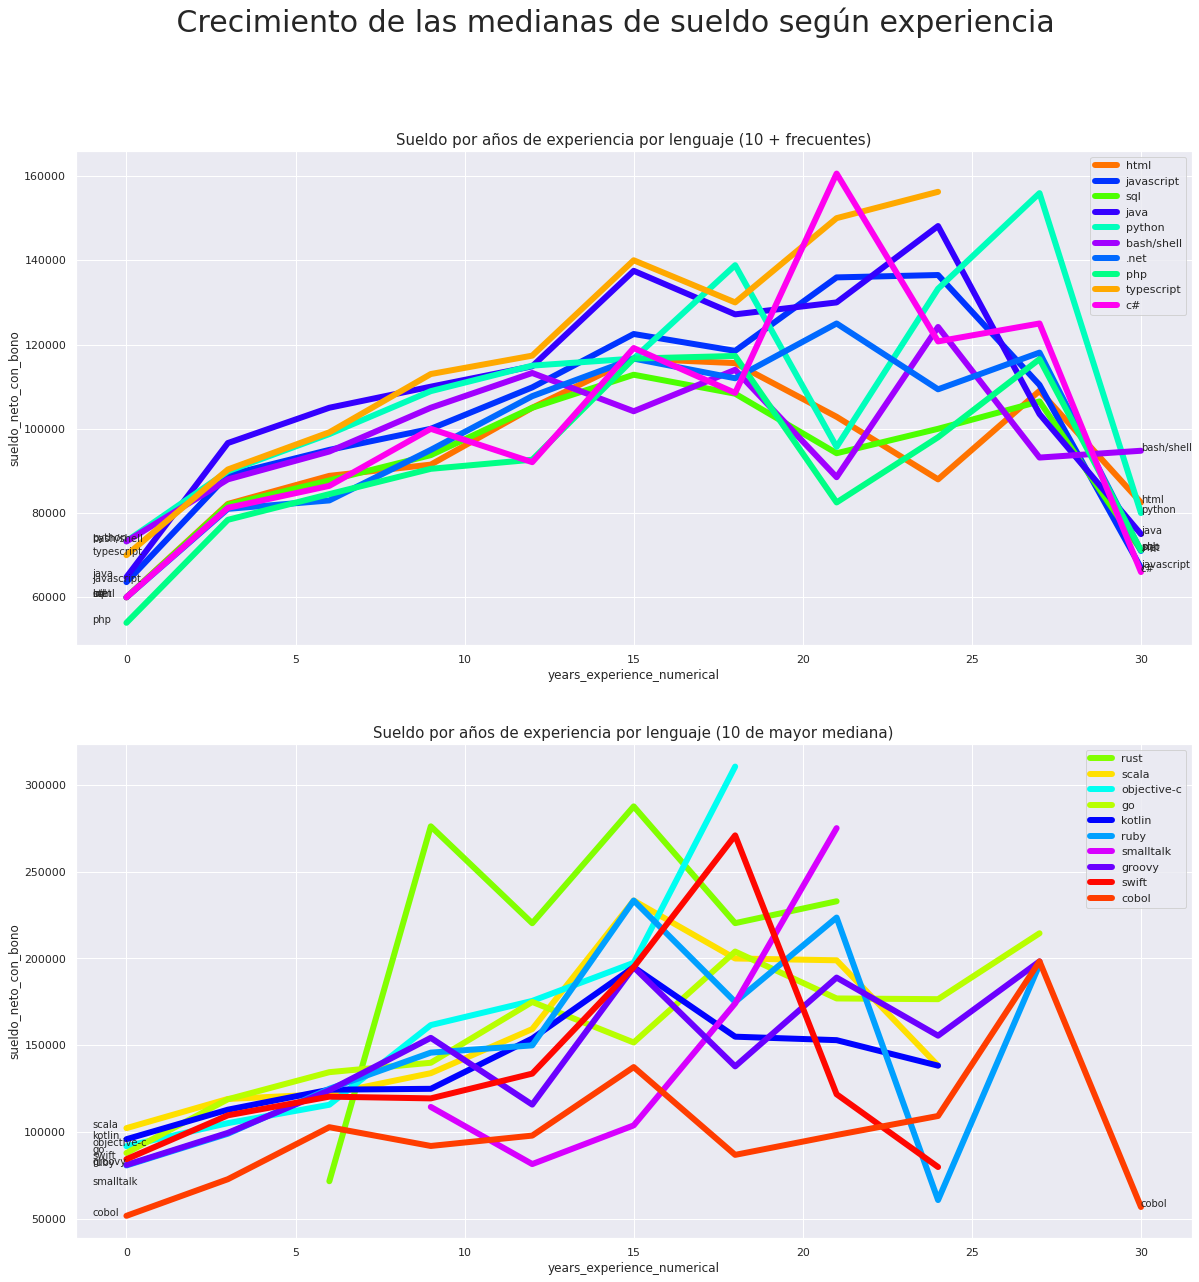

In [ ]:
fig, ax = plt.subplots(2, figsize=(20,20))
seaborn.lineplot(data=df_filter[df_filter.programming_language.isin(lenguajes_ordenados_cantidad[:10])], 
                 x='years_experience_numerical', y='sueldo_neto_con_bono', estimator=numpy.median, 
                 hue='programming_language', hue_order=lenguajes_ordenados_cantidad[:10],
                 linewidth=6, ax=ax[0], ci=None, palette = [color_map[clr] for clr in lenguajes_ordenados_cantidad[:10]])
seaborn.lineplot(data=df_filter[df_filter.programming_language.isin(lenguajes_ordenados_mediana[-10:])], 
                 x='years_experience_numerical', y='sueldo_neto_con_bono', estimator=numpy.median, 
                 hue='programming_language', hue_order=list(reversed(lenguajes_ordenados_mediana[-10:])),
                 linewidth=6, ax=ax[1], ci=None, palette = [color_map[clr] for clr in list(reversed(lenguajes_ordenados_mediana[-10:]))])

ax[0].set_title('Sueldo por años de experiencia por lenguaje (10 + frecuentes)', fontdict={'fontsize':15})
ax[1].set_title('Sueldo por años de experiencia por lenguaje (10 de mayor mediana)', fontdict={'fontsize':15})

#Leyendas al inicio y al final de las líneas
legends_locs = [0, 30]
for loc in legends_locs:
  medians_per_loc = df_filter[(df_filter.programming_language.isin(lenguajes_ordenados_cantidad[:10])) & (df_filter.years_experience_numerical == loc)].groupby('programming_language').sueldo_neto_con_bono.median().sort_values(ascending=False)
  for legend in medians_per_loc.index:
    move = 1 if loc == 0 else 0
    ax[0].text(loc-move, medians_per_loc[legend], legend)

for loc in legends_locs:
  medians_per_loc = df_filter[(df_filter.programming_language.isin(lenguajes_ordenados_mediana[-10:])) & (df_filter.years_experience_numerical == loc)].groupby('programming_language').sueldo_neto_con_bono.median().sort_values(ascending=False)
  for legend in medians_per_loc.index:
    move = 1 if loc == 0 else 0
    ax[1].text(loc-move, medians_per_loc[legend], legend)

#linewidth del legend
for i in [0,1]:
  leg = ax[i].legend()
  for line in leg.get_lines():
    line.set_linewidth(6.0)

fig.suptitle(' Crecimiento de las medianas de sueldo según experiencia ', fontsize=30)


#### Resulta relevante analizar, para estos 10 lenguajes de mayor mediana, la población existente de cada uno, para poder inferir la dificultad de ingresar al "mercado" de ese lenguaje:

Text(0.5, 0.98, ' Distribución de programadores según experiencia ')

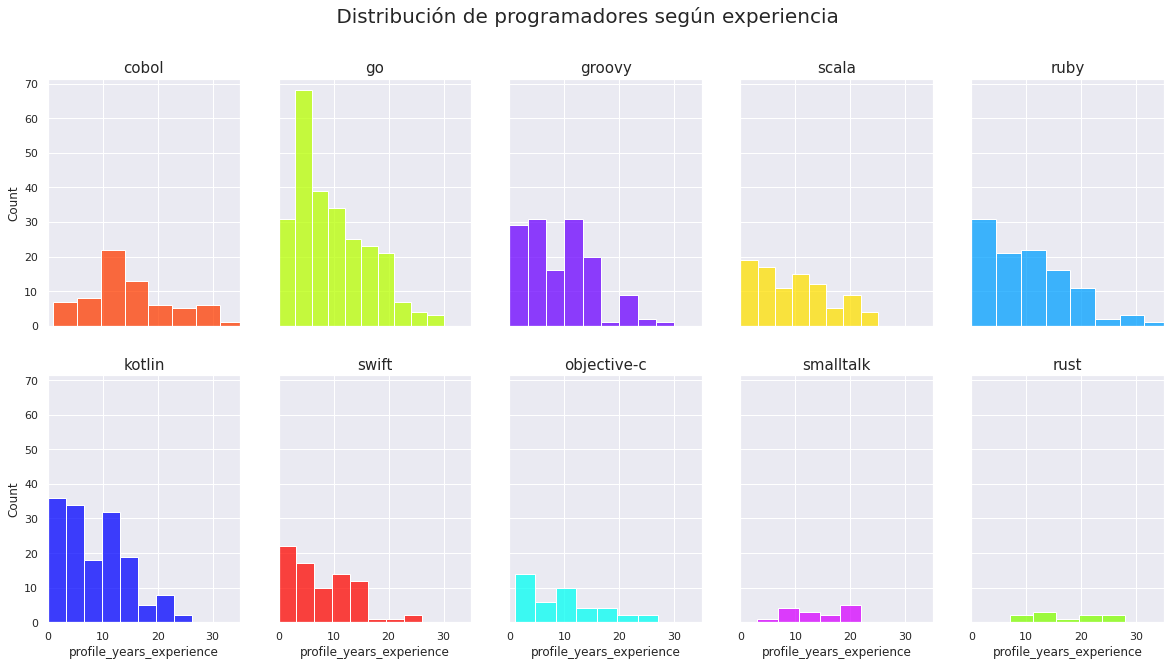

In [ ]:
fig, axes = plt.subplots(2,5,sharey=True,sharex=True, figsize=(20,10))
i = 0
j = 0
for lang in lenguajes_ordenados_mediana[-10:]:
  seaborn.histplot(data=df_filter[df_filter.programming_language == lang], x='profile_years_experience', 
                   ax=axes[i][j], color = color_map[lang])
  axes[i][j].set_title(lang, fontsize=15)
  axes[i][j].set_xlim([0, 35])
  i += 1
  i = i % 2
  j += 1
  j = j % 5
fig.suptitle(' Distribución de programadores según experiencia ', fontsize=20)

Text(0.5, 0.98, ' Conteo total de programadores por lenguaje ')

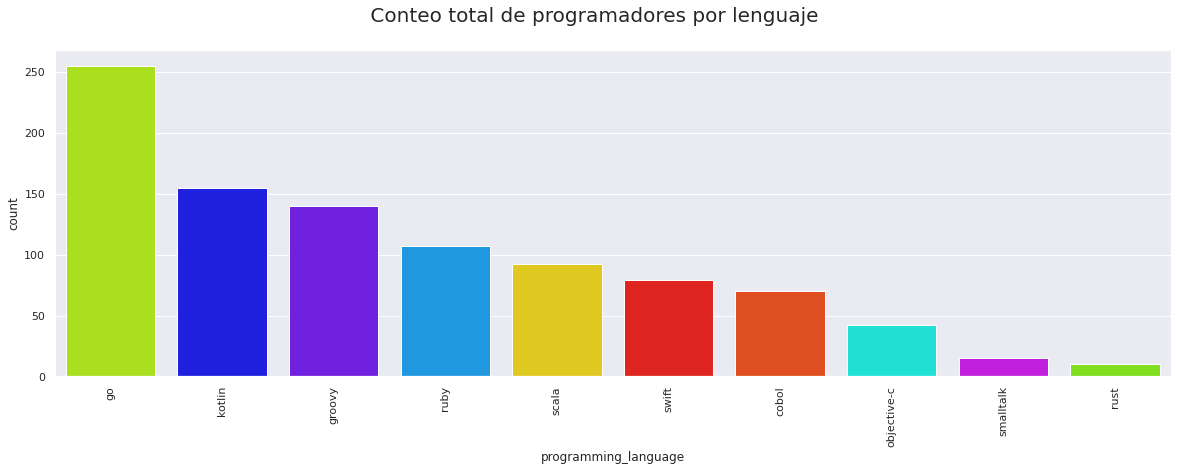

In [ ]:
fig = plt.figure(figsize=(20, 6))
chart = seaborn.countplot(
    x=df_filter[df_filter.programming_language.isin(lenguajes_ordenados_mediana[-10:])]['programming_language'],
    color='steelblue',
    order = df_filter[df_filter.programming_language.isin(lenguajes_ordenados_mediana[-10:])]['programming_language'].value_counts().index,
    palette = [color_map[clr] for clr in df_filter[df_filter.programming_language.isin(lenguajes_ordenados_mediana[-10:])]['programming_language'].value_counts().index]
)
labels = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
fig.suptitle(' Conteo total de programadores por lenguaje ', fontsize=20)

###Conclusiones:
----------------------
#### Se observa una clara tendencia creciente en los sueldos con los años, lo que podría resultar esperable. Pero además, se pueden observar varios puntos de quiebre en esta evolución: a los 3, a los 12 y  a los 18 años de experiencia. 
####De 0 a 3 años, el crecimiento de la mediana de salarios es acelerado. 
####Entre los 3 y los 12 años se ve un crecimiento menor, pero creciente para todos los lenguajes. 
#### Entre los 12 y los 18 años, existen lenguajes cuya mediana de salarios decrece, pero son pocos.
#### A partir de los 18 años de experiencia, se nota una gran variabilidad de la mediana del salario entre distintos lenguajes. Varios de ellos ven decrecido su valor. La variabilidad grande está atada probablemente a un tamaño de subpoblación chico, sin embargo la tendencia general a decrecer es demarcatoria de un punto de la carrera de los programadores en los que empieza a perder valor su aporte al mercado.
####Esto último puede estar relacionado con una tendencia a perder la actualización en las tecnologías más relevantes al alcanzar los 18 años de carrera, y a la preponderancia de otras habilidades además de las de programación en la balanza del salario cuando se alcanza estos grados de seniority: habilidades de gerenciamiento y negociación.   
----------------------
####Dentro de los lenguajes más populares (de mayor frecuencia), se puede observar que Bash/Shell comienza como uno de los mejores pagos para personas sin experiencia, pero conforme mayor es la cantidad de años de experiencia, va decreciendo su relevancia con respecto a otros lenguajes. Esto se relaciona con un lenguaje que muchos programadores utilizan conforme aumenta su seniority, pero que es difícil de conseguir en programadores con nula experiencia.
#### Los lenguajes Java, Typescript y Python son los de mayor mediana en la mayor parte del rango de años de experiencia. En particular, Java comienza como un lenguaje mal remunerado, lo que indica que probablemente se trata de un lenguaje de mucha demanda y mucho crecimiento: con muchos programadores de nula o poca experiencia, pero  pocos experimentados y por ende que consiguen mejores salarios. 
#### Por otro lado, Typescript y Python mantienen la mejor mediana de salarios a través de todo el rango de antiguedad. Pero esto es comparándolos únicamente dentro de los lenguajes más utilizados. Ambos pierden si se comparan con algunos de los lenguajes menos populares.
---------------------
#### Dentro de los lenguajes de mayor mediana, para los programadores de poca experiencia, los más interesantes teniendo en cuenta el salario resultan scala, kotlin, objective-c, go y swift. Scala, por ejemplo, tiene una mediana de salario mejor con 0 años de experiencia que programadores de Java con 3 años de experiencia. Estos lenguajes mantienen su podio en comparación a los otros 10 en casi todas las subpoblaciones por años de antiguedad, con lo que son favoritos en este análisis.
#### Al margen de esto, podemos agregar que claramente se trata de lenguajes con menor población de casos, lo que se nota en la poca suavidad de curvas como la de Rust y la de Smalltalk. En ambos casos no existen programadores de pocos años de experiencia. En el caso Rust, tenemos una población muy acotada, pero de grandes salarios. Lo que podemos considerar como un nicho de mercado.
#### Normalmente, los nichos de mercado tienen barreras altas de entrada. Por esto, si también ponemos en valor la facilidad de acceder a un lenguaje, y lo estimamos a través de la población existente para dicho lenguaje, podemos observar que, de estos 10 lenguajes de mayor mediana, Go, Kotlin, Groovy, Ruby, Swift y Scala son los que mayor frecuencia tienen. Esto probablemente indica un mercado mayor, con menores barreras de entrada, con alto nieveles de salario, para todos los rangos de antiguedad.





-------------------
---------------------
-------------------
#Resolución ejercicio 2
## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa


Como ya se han utilizado los boxenplot en el ejercicio 1, utilizamos los jointplot para analizar este caso, lo que nos otorga otro modo de analizar la dispersión de variables numéricas y categóricas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Densidad conjunta por nivel de estudios')

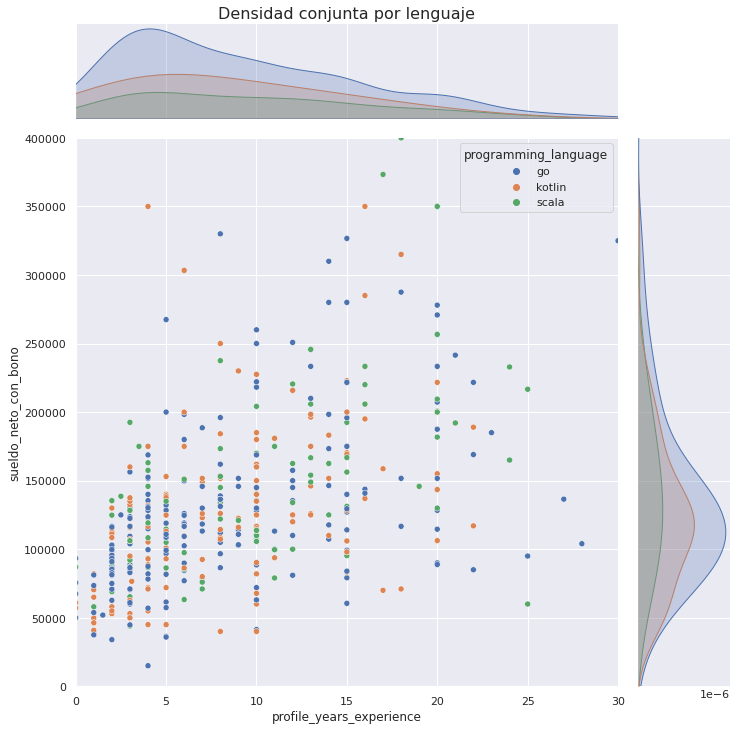

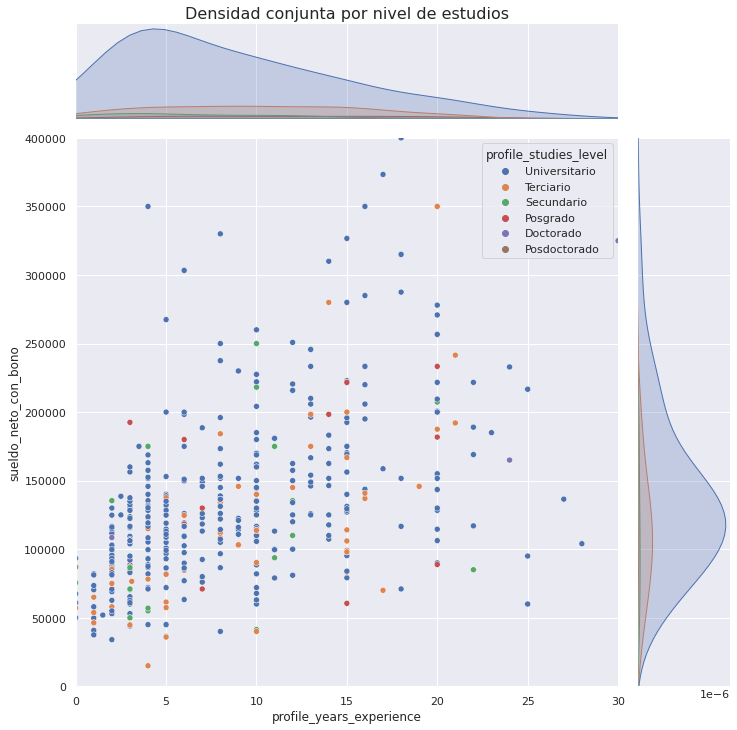

In [ ]:
# fig, axes = plt.subplots(2,figsize=(12,8))

#Se analiza los lenguajes scala, go y kotlin que resultaron "vencedores" del análisis del ej. 1
relevant_langs = ['scala','go','kotlin']
height = 10
plot1 = seaborn.jointplot(data=df_filter[df_filter.programming_language.isin(relevant_langs)], 
                  x='profile_years_experience', y='sueldo_neto_con_bono',
                  hue='programming_language', height=height)
plot1.ax_marg_x.set_xlim(0, 30)
plot1.ax_marg_y.set_ylim(0, 400000)
plot1.ax_marg_x.set_title('Densidad conjunta por lenguaje', fontdict={'fontsize':16})
# plot.ax_marg_y.set_ylim(0, 1200)

plot2 = seaborn.jointplot(data=df_filter[df_filter.programming_language.isin(relevant_langs)], 
                  x='profile_years_experience', y='sueldo_neto_con_bono',
                  hue='profile_studies_level', height=height)
plot2.ax_marg_x.set_xlim(0, 30)
plot2.ax_marg_y.set_ylim(0, 400000)
plot2.ax_marg_x.set_title('Densidad conjunta por nivel de estudios', fontdict={'fontsize':16})

Un análisis similar, pero realizado con boxenplot permite observar que aquellos que han alcanzado nivel terciario, tienen en general mayor cantidad de años de experiencia que los que alcanzaron nivel universitario:



(0.0, 40.0)

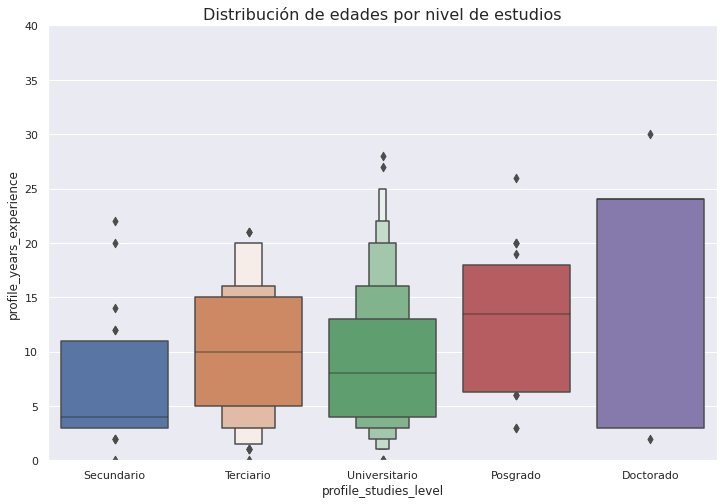

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
studies_order = ['Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado']
plot2 = seaborn.boxenplot(data=df_filter[df_filter.programming_language.isin(relevant_langs)], 
                  x='profile_studies_level', y='profile_years_experience',ax =ax, order=studies_order)
ax.set_title('Distribución de edades por nivel de estudios', fontdict={'fontsize':16})
ax.set_ylim(0,40)

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría

In [ ]:
# Filtramos los datos de mi data frame original (df_lang). Es decir, sin contemplar la relacion entre salarios neto y bruto. 

# Elimino de mi data frame aquellas personas que no programan
df_lang_filtered = df_lang[df_lang.cured_programming_languages.apply(lambda ele: ele != ["ninguno"])].copy()

# Elimino las filas que presentan un espacio vacio en lenguaje de programacion
df_lang_filtered.programming_language = df_lang_filtered.programming_language.apply(lambda ele: "".join(ele.split()))
df_lang_filtered = df_lang_filtered[df_lang_filtered.programming_language != ""]

# Elimino las personas que como respuesta al lenguaje de programación que usan escribieron "no"
df_lang_filtered = df_lang_filtered[df_lang_filtered.programming_language != "no"]

# Unifico lenguajes 
df_lang_filtered.programming_language = df_lang_filtered.programming_language.replace("pl/sql", "sql").replace('css', 'html')


Nos quedamos con dos data frames filtrados de la misma manera, df_lang_filtered (que no considera ninguna relación entre salarios Bruto y Neto) y df_filter (que selecciona aquellos salarios que sufren un descuento de entre 10 y 50%; es decir, sueldos en blanco). Evaluamos si existe o no correlación entre las variables sueldo Bruto y Neto para cada data frame. Para ello utilizamos el paquete pingouin, que es uno de los más completos.  

In [ ]:
!pip install pingouin
import pingouin as pg

     |████████████████████████████████| 204kB 8.8MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.11-cp37-none-any.whl size=203325 sha256=644cbb5d6d6ead7f270501e6aa23a4c14ceaaf6f2130cf99dda4b865449b571d
  Stored in directory: /root/.cache/pip/wheels/79/46/ef/e377eb45c86f278f660d31c4a30e3f733063d28c89462f1aea
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=6af3ddc119eab5b759341a380d956da9c0c408ba958b28ecc22978d8ffc77046
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [ ]:
display(pg.corr(df_lang_filtered['salary_monthly_NETO'], df_lang_filtered['salary_monthly_BRUTO'], method='pearson'))

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,17020,0.869407,"[0.87, 0.87]",0.755868,0.755839,0.0,inf,1.0


In [ ]:
display(pg.corr(df_filter['salary_monthly_NETO'], df_filter['salary_monthly_BRUTO'], method='pearson'))

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,13293,0.965734,"[0.96, 0.97]",0.932642,0.932632,0.0,inf,1.0


  En ambos casos, existe un grado de correlación entre ambas variables alto (r = 0.087 y r = 0.97), con un valor p de 0.0. Esto indica que existe muy poca probabilidad para afirmar que nuestra hipótesis nula (las variables son indiependientes) sea cierta. En otras palabras, nuestras variables están correlacionadas. 
  Por otra parte, los coeficientes de determinación (r2) son diferentes: 0.76 para el data frame que considera todos los casos y 0.93 para el data frame que considera únicamente los casos de sueldos en blanco. Los r2 indican la cantidad de varianza que una de las variables explica de la otra. En el data frame donde se han filtrado los sueldos en blanco, la mayor parte de la varianza del sueldo Neto es explicada por el Sueldo Bruto, por lo que en este caso ambas variables me estarían dando la misma información y sería prudente descartar el salario bruto de la encuesta para hacerla más sencilla. Sin embargo, si elimino la columna de sueldo Bruto en el data frame con la totalidad de sueldos, me estaría perdiendo información que me aportan ciertos casos, aunque pocos, particuares. 

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación



(0.0, 500000.0)

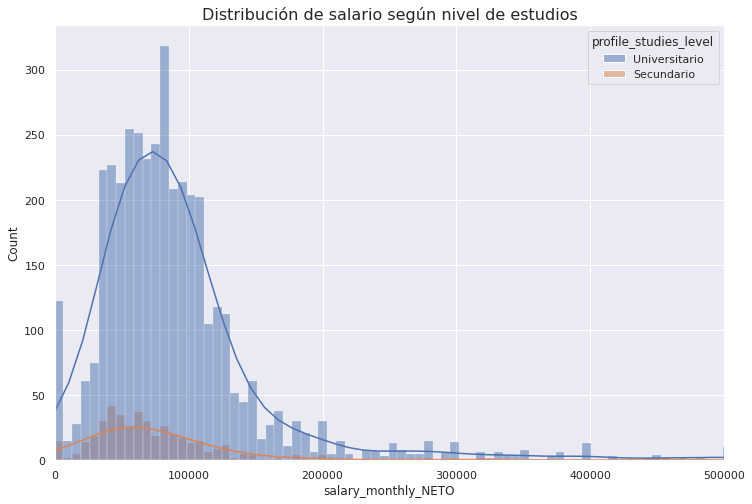

In [ ]:
rel_studies_level = ['Secundario', 'Universitario']
fig, ax = plt.subplots(figsize=(12,8))
seaborn.histplot(data=df[df.profile_studies_level.isin(rel_studies_level)], 
                x='salary_monthly_NETO', hue='profile_studies_level',
                ax=ax, common_norm=False, kde=True)
ax.set_title('Distribución de salario según nivel de estudios', fontdict={'fontsize':16} )
ax.set_xlim(0,500000)

Se puede observar que el nivel de salario no es independiente al nivel de estudios. Los universitarios, además de ser muchos más en población, tienen una mediana mayor, y una cola hacia outliers de gran salario mucho mayor que aquellos que tienen al secundario como máximo nivel alcanzado de estudios.
Esto también se puede ver analizando las probabilidades condicionadas de cobrar más que la media de salarios para cada nivel de estudio, y observar que para el caso de los universitarios es mayor que para el de los secundarios, otra prueba más de que estas dos variables no son independientes (salario y nivel de estudios):

In [ ]:
media_salarios = df.salary_monthly_NETO.mean()
#P(cobras más de la media / alcanzó nivel Universitario)
prob_univs = len(df[(df.profile_studies_level == 'Universitario') & (df.salary_monthly_NETO > media_salarios)]) / len(df[(df.profile_studies_level == 'Universitario')])
#P(cobras más de la media / alcanzó nivel Secundario)
prob_secund = len(df[(df.profile_studies_level == 'Secundario') & (df.salary_monthly_NETO > media_salarios)]) / len(df[(df.profile_studies_level == 'Secundario')])

print('P(cobras más de la media / alcanzó nivel Universitario): ', prob_univs)
print('P(cobras más de la media / alcanzó nivel Secundario): ', prob_secund)

P(cobras más de la media / alcanzó nivel Universitario):  0.34986692475199616
P(cobras más de la media / alcanzó nivel Secundario):  0.23608017817371937


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)

Text(0.5, 1.0, 'Densidad conjunta de salario y edad, separada por nivel de satisfacción')

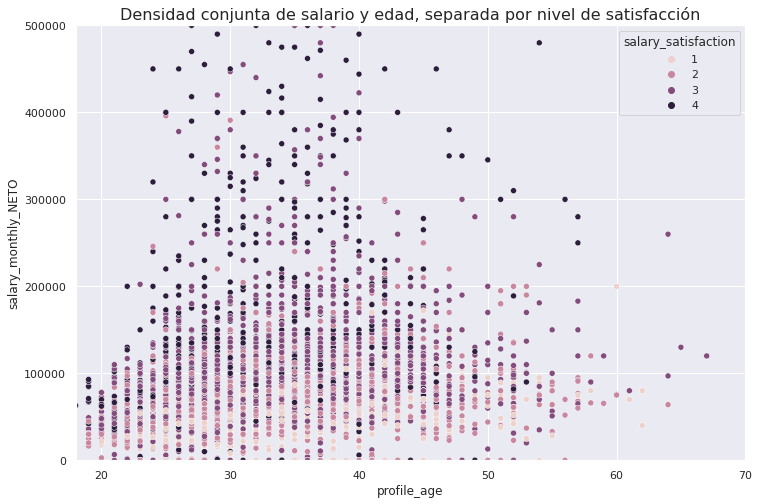

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
seaborn.scatterplot(data=df, x='profile_age', y='salary_monthly_NETO', 
                    ax=ax, hue='salary_satisfaction')
ax.set_ylim(0,500000)
ax.set_xlim(18,70)
ax.set_title('Densidad conjunta de salario y edad, separada por nivel de satisfacción', fontdict={'fontsize':16})


